In [133]:
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data

In [134]:
Default = load_data('Default')


In [135]:
y = pd.get_dummies(Default['default'])
X_quantiative = Default[['income','balance']]
X_qualitative = pd.get_dummies(Default[['student']], drop_first=True)
X = sm.add_constant(pd.concat([X_quantiative, X_qualitative], axis=1))
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          ['No', 'Yes']   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Thu, 07 Mar 2024   Deviance:                       1571.5
Time:                        14:22:33   Pearson chi2:                 7.00e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1262
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8690      0.492     22.079      

In [136]:
from sklearn.linear_model import LogisticRegression
y = Default['default']
X_quantiative = Default[['balance']]
X_qualitative = pd.get_dummies(Default['student'], drop_first=True)
X = sm.add_constant(pd.concat([X_quantiative, X_qualitative], axis=1))
model = LogisticRegression()
model.fit(X, y)
ypred = model.predict(X)
ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [137]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score,recall_score
print("Confusion Matrix:")
print(confusion_matrix(y,ypred))
print("Accuracy: ",accuracy_score(y,ypred))
print("f1-Score: ",f1_score(y,ypred,pos_label='Yes'))
print("Recall: ",recall_score(y,ypred,pos_label='Yes'))

Confusion Matrix:
[[9632   35]
 [ 231  102]]
Accuracy:  0.9734
f1-Score:  0.4340425531914893
Recall:  0.3063063063063063


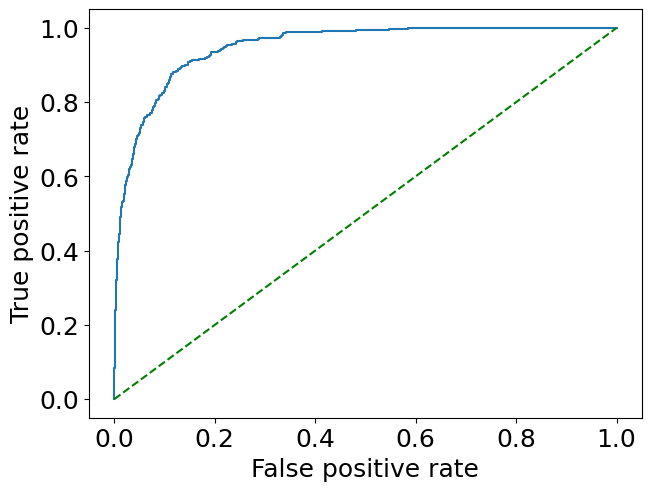

In [138]:
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y,model.decision_function(X),pos_label='Yes')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()


In [139]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier().fit(X,y)
ypred_baseline = baseline.predict(X)
ypred_baseline

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [140]:
print("Confusion Matrix:")
print(confusion_matrix(y,ypred_baseline))
print("Accuracy: ",accuracy_score(y,ypred_baseline))
print("f1-Score: ",f1_score(y,ypred_baseline,pos_label='Yes'))
print("Recall: ",recall_score(y,ypred_baseline,pos_label='Yes'))

Confusion Matrix:
[[9667    0]
 [ 333    0]]
Accuracy:  0.9667
f1-Score:  0.0
Recall:  0.0


In [141]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [142]:
y = Boston['chas']
X = Boston[['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']]
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   chas   No. Observations:                  506
Model:                            GLM   Df Residuals:                      494
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.14
Date:                Thu, 07 Mar 2024   Deviance:                       212.28
Time:                        14:22:34   Pearson chi2:                     335.
No. Iterations:                     8   Pseudo R-squ. (CS):            0.08006
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2830      0.148     -1.912      0.0

In [143]:

# Fit the linear regression model
model_sklearn = LogisticRegression().fit(X, y)

# Make predictions on the test set
ypred = model_sklearn.predict(X)

# Evaluate the model
mse = mean_squared_error(y, ypred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0691699604743083


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:

print("Confusion Matrix:")
print(confusion_matrix(y, ypred))
print("Accuracy: ", accuracy_score(y, ypred))
print("F1-Score: ", f1_score(y, ypred, pos_label=1))
print("Recall: ", recall_score(y, ypred, pos_label=1))



Confusion Matrix:
[[471   0]
 [ 35   0]]
Accuracy:  0.9308300395256917
F1-Score:  0.0
Recall:  0.0


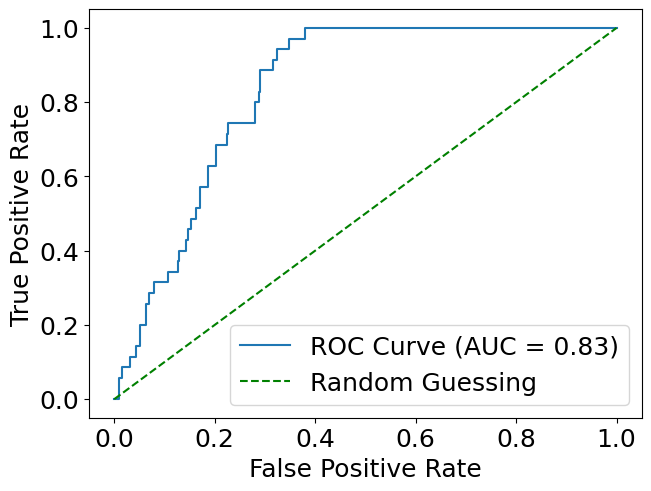

In [145]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y, model_sklearn.predict_proba(X)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')
plt.legend(loc='lower right')
plt.show()